In [53]:
 import numpy as np
import matplotlib.pyplot as plt

# Задача 1.

$$
\begin{aligned}
& \frac{y_k^{n+1}-y_k^n}{\tau}+\frac{a}{2}\left[\frac{y_{k+1}^{n+1}-y_{k-1}^{n+1}}{2 h}+\frac{y_{k+1}^n-y_{k-1}^n}{2 h}\right]=\frac{1}{2}\left(f_k^{n+1}+f_k^n\right), \\
& y_k^0=\varphi\left(x_k\right) \quad k=0, \pm 1, \ldots, n=0,1,2, \ldots
\end{aligned}
$$

для задачи 

$$u_t+a u_x=f(t, x) \quad u(0, x)=\varphi(x) \quad t \geq 0 \quad -\infty<x<\infty$$


**Аппроксимация**: раскладываем в ряд Тейлора.

$\frac{1}{\tau}(u+u_t\tau+\frac{1}{2}u_{tt}\tau^2+\frac{1}{6}u_{ttt}\tau^3-u+O(\tau^4)) + \frac{a}{4h}(u + u_x h + u_t \tau + \frac{1}{2}u_{xx}h^2 + u_{xt}h\tau + \frac{1}{2}u_{tt}\tau^2 + \frac{1}{6}u_{xxx}h^3 + \frac{1}{2}u_{xxt}h^2\tau + \frac{1}{2}u_{ttx}h\tau^2- u + u_x h - u_t \tau - \frac{1}{2}u_{xx}h^2 + u_{xt}h\tau- \frac{1}{2}u_{tt}\tau^2 + \frac{1}{6}u_{xxx}h^3 - \frac{1}{2}u_{xxt}h^2\tau + \frac{1}{2}u_{ttx}h\tau^2 + u + u_x h + \frac{1}{2}u_{xx}h^2 + \frac{1}{6}u_{xxx}h^3 - u + u_x h - \frac{1}{2}u_{xx}h^2 + \frac{1}{6}u_{xxx}h^3 + O(h^4) + O(\tau^3)) = \frac{1}{2}(f + f_t \tau + \frac{1}{2}f_{tt}\tau^2 - f + O(\tau^3))$

Упрощая, получаем:

$u_t + au_x + \frac{\tau}{2}(u_{tt}+ au_{xt}-f_t) + \tau^2(\frac{1}{6}u_{ttt}+\frac{1}{4}u_{ttx}-\frac{1}{4}f_{tt}) + \frac{1}{6}u_{xxx}h^2 + O(\tau^3 + h^3)= f$. Коэффициент при $\tau$ равен нулю, поскольку это есть частная производная по t от уравнения. Таким образом, порядок аппроксимации $O(\tau^2, h^2)$.

**Сходимость**: исследуем фурье-гармоники $y_m^n = \lambda^ne^{i\alpha m}$

$\frac{1}{\tau}\lambda^n(\lambda - 1)e^{i\alpha k} + \frac{a}{4h}\lambda^ne^{i\alpha k}(\lambda+1)(e^{i\alpha}-e^{-i\alpha}) = 0\Rightarrow \lambda = \dfrac{\frac{1}{\tau} - \frac{ia\sin{\alpha}}{2h}}{\frac{1}{\tau} + \frac{ia\sin{\alpha}}{2h}}\Rightarrow |\lambda| = 1\Rightarrow$ схема безусловно устойчива.

**Численное решение** Послойный переход осуществляется через уравнение: $-r y^{n+1}_{k-1} + y^{n+1}_k + r y^{n+1}_{k+1} = r y^{n}_{k-1} + y^{n}_k - r y^{n}_{k+1} + \frac{\tau}{2}(f^{n+1}_k + f^{n}_k)$, где $r = \frac{a\tau}{4h}$

**Численное решение получается с достаточно большой ошибкой, так как нет возможности о

100%|███████████████████████████████████████████████████████████████████████████████| 999/999 [00:01<00:00, 693.20it/s]


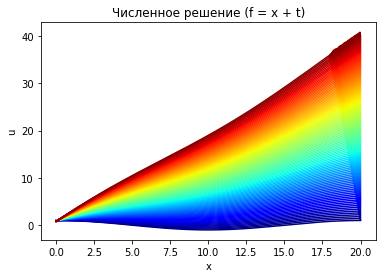

In [1]:
# Пример схемы Кранка-Никольсон с f = 0 методом прогонки

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#from numba import njit
from tqdm import tqdm


def TDMA(A,B,C, F): # Прогонка
    # A, B, C, F - просто числовые последовательности, НЕ матрицы

    A = np.insert(A, 0, 0)
    
    n = len(F)
    x = np.zeros(n)
    alpha = np.zeros(n)
    beta = np.zeros(n)
    
    alpha[1] = -C[0]/B[0]
    beta[1] = F[0]/B[0]

    for i in range(2, n):
        alpha[i] = -C[i-1]/(A[i-1]*alpha[i-1] + B[i-1])
        beta[i] = (F[i-1] - A[i-1]*beta[i-1])/(A[i-1]*alpha[i-1] + B[i-1])
        

    x[n-1] = (F[n-1] - A[n-1]*beta[n-1])/(B[n-1] + A[n-1]*alpha[n-1])
    
    
    for i in range(n-1, 0, -1):  # помним, что последнее значение не кушает
        x[i - 1] = alpha[i]*x[i] + beta[i]
        
    
    return x

# Parameters
a = 1.0
L = 20
T = 2
Nx = 500
Nt = 1000 # Как же мало нам понадобилось шагов по времени!
h = L/(Nx-1)
tau = T/(Nt-1)
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
# Initial and boundary conditions
def u0(x):
    return np.cos(2 * np.pi * x/L)
# def ul(t):
#     return 0
# def ur(t):
#     return 0
# Define the source term
def f(t, x):
    return x + t

# Initialize the solution matrix
u = np.zeros((Nt, Nx))

# Set the initial condition
u[0, :] = u0(x)

# Set the boundary conditions
# u[:, 0] = ul(t)
# u[:, -1] = ur(t)

# Set up the matrix for the Crank-Nicolson scheme
r = a*tau/(4*h)
A = np.zeros((Nx, Nx))
for i in range(1, Nx-1): # ПОмним, что последний индекс в цикле НЕ кушается
    A[i, i] = 1
    A[i, i-1] = -r
    A[i, i+1] = r
A[0, 0] = 1 - 4*r
A[0, 1] = 4*r

A[-1, -1] = 1 + 4*r
A[-1, -2] = -4*r


B = np.zeros((Nx, Nx))
for i in range(1, Nx-1): # ПОмним, что последний индекс в цикле НЕ кушается
    B[i, i] = 1
    B[i, i-1] = r
    B[i, i+1] = -r
B[0,0] = 1
B[-1,-1] = 1
# Time stepping with the Crank-Nicolson scheme
for n in tqdm(range(1, Nt)):
    
    b = np.zeros(Nx)
    b[0] = tau*f(t[n - 1], x[0])
    b[1] = tau*f(t[n - 1], x[1])
    b[1:-1] = tau/2*(f(t[n - 1], x[1:-1]) + f(t[n], x[1:-1]))
    
    #print(b)
    
    F = B @ u[n-1, :] + b

    #u[n, :] = np.linalg.solve(A, F) # Не сработает для большого Nx
    u[n] = TDMA(A.diagonal(offset = -1),
                     A.diagonal(offset = 0),
                     A.diagonal(offset = 1),
                     F)
# Plot every 100th timestep
fig, ax = plt.subplots()
for n in range(0, Nt, 10):
    color = cm.jet(n/Nt)
    ax.plot(x, u[n,:], color=color, label=f"t={t[n]:.2f}")

ax.set_xlabel("x")
ax.set_ylabel("u")
norm = plt.Normalize(0, T)
cmap = cm.jet
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
plt.title('Численное решение (f = x + t)')
#cbar = fig.colorbar(sm)
#cbar.ax.set_ylabel("Time")
plt.show()


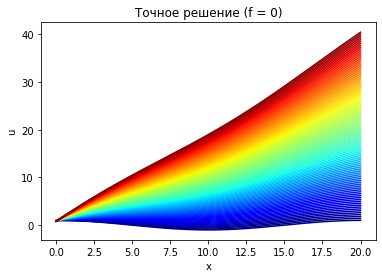

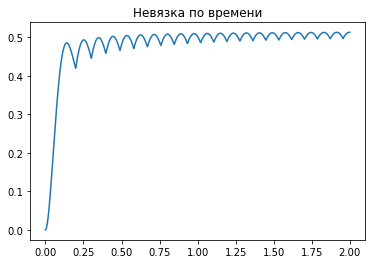

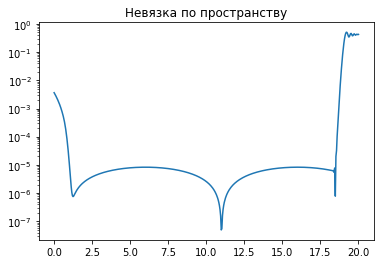

In [2]:
fig, ax = plt.subplots()
for n in range(0, Nt, 10):
    color = cm.jet(n/Nt)
    ax.plot(x, u0(x - t[n]) - (x - t[n])**2/4 + (x + t[n])**2/4, color=color, label=f"t={t[n]:.2f}")
    #ax.plot(x, u0(x - t[n]) , color=color, label=f"t={t[n]:.2f}")

ax.set_xlabel("x")
ax.set_ylabel("u")
norm = plt.Normalize(0, T)
cmap = cm.jet
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
plt.title('Точное решение (f = 0)')
plt.show()
err = np.zeros(Nt)
for n in range(Nt):
    err[n] = np.max(u[n] - (u0(x - t[n]) - (x - t[n])**2/4 + (x + t[n])**2/4))
    #err[n] = np.max(np.abs(u[n,:] - (u0(x - t[n]))))
plt.plot(t, err)
plt.title('Невязка по времени')
plt.show()
plt.plot(x, abs(u[Nt//2,:] - (u0(x - t[Nt//2]) - (x - t[Nt//2])**2/4 + (x + t[Nt//2])**2/4)))
#plt.plot(x, abs(u[Nt//2,:] - (u0(x - t[Nt//2]))))
plt.title('Невязка по пространству')
plt.yscale('log')
plt.show()


# Задача 2.

$\frac{\partial u}{\partial t} - a^2(x,t)\frac{\partial^2 u}{\partial x^2} = 0,\ u(x,0) = \psi(x)$

**(1)** Возьмем схему из семинара: $$
\begin{aligned}
& \quad \frac{u_m^{n+1}-u_m^n}{\tau}-\frac{1}{2 h}\left[\left(a_{m+1 / 2}^n \frac{u_{m+1}^n-u_m^n}{h}-a_{m-1 / 2}^n \frac{u_m^n-u_{m-1}^n}{h}\right)+\right. \\
& \left.+\left(a_{m+1 / 2}^{n+1} \frac{u_{m+1}^{n+1}-u_m^{n+1}}{h}-a_{m-1 / 2}^{n+1} \frac{u_m^{n+1}-u_{m-1}^{n+1}}{h}\right)\right]=0
\end{aligned}
$$

Считая $a = const$ (принцип замороженных коэффициентов) и подставляя $u^n_m = \lambda^n e^{i\alpha m}$, получаем:

$(\lambda - 1) + \frac{2a\tau}{h^2}(\lambda + 1)\sin^2{\alpha/2} = 0,\ r = \frac{a\tau}{h^2}$. Отсюда $\lambda = \dfrac{1-2r\sin^2{\alpha/2}}{1+2r\sin^2{\alpha/2}}\Rightarrow |\lambda|\leq 1$ - **схема безусловно устойчива**.

**(2)** Дискретизуем закон сохранения в следующем виде: $\dfrac{u^{n+1}_m - u^n_m}{\tau} + \dfrac{W^n_{m+1}-W^n_m}{h} = 0$,
$W^n_{m+1} = -a^n_{m+1}\dfrac{u^n_{m+1} - u^n_m}{h},\ W^n_m =  -a^n_{m}\dfrac{u^n_{m} - u^n_{m-1}}{h}$

Отсюда получаем схему: $\dfrac{u^{n+1} - u^n_m}{\tau} - \dfrac{1}{h}\left(a^n_{m}\dfrac{u^n_{m} - u^n_{m-1}}{h}+a^n_{m+1}\dfrac{u^n_{m+1} - u^n_m}{h}\right) = 0$

Подставляя $u^n_m = \lambda^n e^{i\alpha m}$, получаем:
$(\lambda - 1) - 2ir\sin{\alpha} = 0\Rightarrow \lambda = 1 + 2ir\sin{\alpha}\Rightarrow |\lambda| \geq 1$ - **схема безусловно неустойчива**


# Задача 3.

$$
\begin{aligned}
& u_t=u_{x x}+u_{y y}+f(x, y, t), \quad 0 \leq x \leq 1, \;0 \leq y \leq 1, \;0<t, \\ \\
& f(x, y, t)=2 \pi^2 \sin (\pi x) \sin (\pi y), \\
& u(0, y, t)=0, \;u(1, y, t)=0, \; u(x, 0, t)=0,\; u(x, 1, t)=0, \;0<t, \\
& u(x, y, 0)=0, \; 0 \leq x \leq 1, \;0 \leq y \leq 1 .
\end{aligned}
$$

Проверьте, что точным решением дифференциальной задачи является $u(x, y, t)=\left(1-\exp \left(-\pi^2 t\right)\right) \sin (\pi x) \sin (\pi y)$.

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:15<00:00,  6.36it/s]


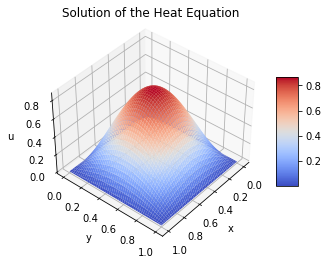

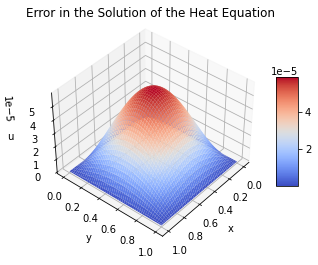

In [63]:
def real_solution(x,y,t):
    return (1-np.exp(-2*np.pi**2*t))*np.sin(np.pi * x)* np.sin(np.pi*y)

# Пример схемы Кранка-Никольсон с f = 0 методом прогонки

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#from numba import njit
from tqdm import tqdm


def TDMA(A,B,C, F): # Прогонка
    # A, B, C, F - просто числовые последовательности, НЕ матрицы

    A = np.insert(A, 0, 0)
    
    n = len(F)
    x = np.zeros(n)
    alpha = np.zeros(n)
    beta = np.zeros(n)
    
    alpha[1] = -C[0]/B[0]
    beta[1] = F[0]/B[0]

    for i in range(2, n):
        alpha[i] = -C[i-1]/(A[i-1]*alpha[i-1] + B[i-1])
        beta[i] = (F[i-1] - A[i-1]*beta[i-1])/(A[i-1]*alpha[i-1] + B[i-1])
        

    x[n-1] = (F[n-1] - A[n-1]*beta[n-1])/(B[n-1] + A[n-1]*alpha[n-1])
    
    
    for i in range(n-1, 0, -1):  # помним, что последнее значение не кушает
        x[i - 1] = alpha[i]*x[i] + beta[i]
        
    
    return x

# Parameters
a = 1.0
Lx = 1.0
Ly = 1.0
T = 0.2
Nx = 100
Ny = 100
Nt = 100 # Как же мало нам понадобилось шагов по времени!
hx = Lx/(Nx - 1)
hy = Ly/(Ny - 1)
tau = T/(Nt - 1)
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
t = np.linspace(0, T, Nt)

# Initial and boundary conditions
def u0(x,y):
    return  0
def ul(t):
    return 0
def ur(t):
    return 0
# Define the source term
def f(t, x, y):
    return 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)

# Initialize the solution matrix
u = np.zeros((Nt, Nx, Ny))

# Set the initial condition
u[0, :, :] = u0(x, y)

# Set the boundary conditions
u[:, 0, :] = ul(t)
u[:, -1, :] = ur(t)
u[:, :, 0] = ul(t)
u[:,:,-1] = ur(t)
# Set up the matrix for the Crank-Nicolson scheme
rx = a*tau/(2*hx**2)
ry = a*tau/(2*hy**2)
Ax = np.zeros((Nx, Nx))
for i in range(1, Nx-1): # ПОмним, что последний индекс в цикле НЕ кушается
    Ax[i, i] = 1 + 2*rx
    Ax[i, i-1] = -rx
    Ax[i, i+1] = -rx
Ax[0, 0] = 1
Ax[-1, -1] = 1

Ay = np.zeros((Ny, Ny))
for i in range(1, Ny-1): # ПОмним, что последний индекс в цикле НЕ кушается
    Ay[i, i] = 1 + 2*ry
    Ay[i, i-1] = -ry
    Ay[i, i+1] = -ry
Ay[0, 0] = 1
Ay[-1, -1] = 1

Bx = np.zeros((Nx, Nx))
for i in range(1, Nx-1): # ПОмним, что последний индекс в цикле НЕ кушается
    Bx[i, i] = 1 - 2*rx
    Bx[i, i-1] = rx
    Bx[i, i+1] = rx

By = np.zeros((Ny, Ny))
for i in range(1, Ny-1): # ПОмним, что последний индекс в цикле НЕ кушается
    By[i, i] = 1 - 2*ry
    By[i, i-1] = ry
    By[i, i+1] = ry

# Time stepping with the Crank-Nicolson scheme
for n in tqdm(range(1, Nt)):
    u_prep = np.zeros((Nx, Ny))
    for l in range(0, Ny):
    
        b = np.zeros(Nx)

        b[0] = ul(t[n])
        b[-1] = ur(t[n])
        b[1: -1] = b[1:-1] = 0.5 * tau * f(t[n - 1], x[1:-1], y[l])

        #print(b)

        Fx = Bx @ u[n-1, :, l] + b

        #u[n, :] = np.linalg.solve(A, F) # Не сработает для большого Nx
        u_prep[:, l] = TDMA(Ax.diagonal(offset = -1),
                         Ax.diagonal(offset = 0),
                         Ax.diagonal(offset = 1),
                         Fx)

    for m in range(0, Nx):
        b = np.zeros(Ny)

        b[0] = ul(t[n])
        b[-1] = ur(t[n])
        b[1: -1] = 0.5 * tau * f(t[n - 1] + tau/2, x[m], y[1:-1])

        #print(b)

        Fy = By @ u_prep[m,:] + b

        #u[n, :] = np.linalg.solve(A, F) # Не сработает для большого Nx
        u[n, m, :] = TDMA(Ay.diagonal(offset = -1),
                         Ay.diagonal(offset = 0),
                         Ay.diagonal(offset = 1),
                         Fy)
    
# Plot every 100th timestep
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=40, azim=40)
X, Y = np.meshgrid(x, y)
Z = u[Nt//2,:,:]
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('Solution of the Heat Equation')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=40, azim=40)
X, Y = np.meshgrid(x, y)
u_real = np.zeros((Nx, Ny))
for m in range(Nx):
    for l in range(Ny):
        u_real[m, l] = real_solution(x[m], y[l], t[Nt//2])
Z = np.abs(u[Nt//2,:,:] - u_real)
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.set_title('Error in the Solution of the Heat Equation')
#ax.set_zscale('log')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



[ 10  19  36  70 135 261 501]


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 899.96it/s]


Max Error N = 10: 0.009248622241333049


100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 405.13it/s]


Max Error N = 19: 0.00237535302674563


100%|█████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 137.58it/s]


Max Error N = 36: 0.0006264302930411025


100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [00:01<00:00, 41.63it/s]


Max Error N = 70: 0.00016138256708497778


100%|████████████████████████████████████████████████████████████████████████████████| 134/134 [00:15<00:00,  8.84it/s]


Max Error N = 135: 4.28098612228478e-05


100%|████████████████████████████████████████████████████████████████████████████████| 260/260 [01:42<00:00,  2.53it/s]


Max Error N = 261: 1.1371027305862036e-05


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [11:54<00:00,  1.43s/it]


Max Error N = 501: 3.0747125600028014e-06
Порядок аппроксимации: -2.042840221148122


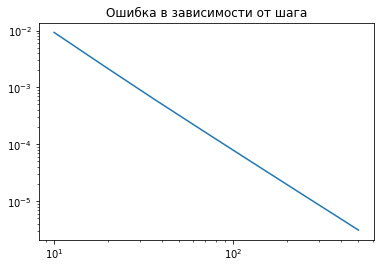

In [89]:
N = np.logspace(1, 2.7, 7).astype('int')
print(N)
err = np.zeros(len(N))

for j, N_txy in enumerate(N):
    # Parameters
    a = 1.0
    Lx = 1.0
    Ly = 1.0
    T = 0.2
    Nt = N_txy
    Nx = N_txy
    Ny = N_txy
    hx = Lx/(Nx - 1)
    hy = Ly/(Ny - 1)
    tau = T/(Nt - 1)
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    t = np.linspace(0, T, Nt)
    
    u_real = np.zeros((Nt, Nx, Ny))
    # предположим, что x.shape==(Nx,), y.shape==(Ny,), t.shape==(Nt,)
    sinx    = np.sin(np.pi * x)        # shape (Nx,)
    siny    = np.sin(np.pi * y)        # shape (Ny,)
    Tfactor = 1 - np.exp(-2 * np.pi**2 * t)  # shape (Nt,)

    # broadcasting: результат shape (Nt, Nx, Ny)
    u_real = Tfactor[:,None,None] * sinx[None,:,None] * siny[None,None,:]

    
    # Initial and boundary conditions
    def u0(x,y):
        return  0
    def ul(t):
        return 0
    def ur(t):
        return 0
    # Define the source term
    def f(t, x, y):
        return 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)

    # Initialize the solution matrix
    u = np.zeros((Nt, Nx, Ny))

    # Set the initial condition
    u[0, :, :] = u0(x, y)

    # Set the boundary conditions
    u[:, 0, :] = ul(t)
    u[:, -1, :] = ur(t)
    u[:, :, 0] = ul(t)
    u[:,:,-1] = ur(t)
    # Set up the matrix for the Crank-Nicolson scheme
    rx = a*tau/(2*hx**2)
    ry = a*tau/(2*hy**2)
    Ax = np.zeros((Nx, Nx))
    for i in range(1, Nx-1): # ПОмним, что последний индекс в цикле НЕ кушается
        Ax[i, i] = 1 + 2*rx
        Ax[i, i-1] = -rx
        Ax[i, i+1] = -rx
    Ax[0, 0] = 1
    Ax[-1, -1] = 1

    Ay = np.zeros((Ny, Ny))
    for i in range(1, Ny-1): # ПОмним, что последний индекс в цикле НЕ кушается
        Ay[i, i] = 1 + 2*ry
        Ay[i, i-1] = -ry
        Ay[i, i+1] = -ry
    Ay[0, 0] = 1
    Ay[-1, -1] = 1

    Bx = np.zeros((Nx, Nx))
    for i in range(1, Nx-1): # ПОмним, что последний индекс в цикле НЕ кушается
        Bx[i, i] = 1 - 2*rx
        Bx[i, i-1] = rx
        Bx[i, i+1] = rx

    By = np.zeros((Ny, Ny))
    for i in range(1, Ny-1): # ПОмним, что последний индекс в цикле НЕ кушается
        By[i, i] = 1 - 2*ry
        By[i, i-1] = ry
        By[i, i+1] = ry

    # Time stepping with the Crank-Nicolson scheme
    for n in tqdm(range(1, Nt)):
        u_prep = np.zeros((Nx, Ny))
        for l in range(0, Ny):

            b = np.zeros(Nx)

            b[0] = ul(t[n])
            b[-1] = ur(t[n])
            b[1: -1] = b[1:-1] = 0.5 * tau * f(t[n - 1], x[1:-1], y[l])

            #print(b)

            Fx = Bx @ u[n-1, :, l] + b

            #u[n, :] = np.linalg.solve(A, F) # Не сработает для большого Nx
            u_prep[:, l] = TDMA(Ax.diagonal(offset = -1),
                             Ax.diagonal(offset = 0),
                             Ax.diagonal(offset = 1),
                             Fx)

        for m in range(0, Nx):
            b = np.zeros(Ny)

            b[0] = ul(t[n])
            b[-1] = ur(t[n])
            b[1: -1] = 0.5 * tau * f(t[n - 1] + tau/2, x[m], y[1:-1])

            #print(b)

            Fy = By @ u_prep[m,:] + b

            #u[n, :] = np.linalg.solve(A, F) # Не сработает для большого Nx
            u[n, m, :] = TDMA(Ay.diagonal(offset = -1),
                             Ay.diagonal(offset = 0),
                             Ay.diagonal(offset = 1),
                             Fy)
    
    err[j] = np.max(np.abs(u[:,:,:] - u_real[:,:,:]))
    print(f'Max Error N = {N_txy}:', err[j])

plt.plot(N, err)
plt.xscale('log')
plt.yscale('log')
plt.title('Ошибка в зависимости от шага')

popt = np.polyfit(np.log(N), np.log(err), deg = 1)
print('Порядок аппроксимации:', popt[0])

# Задание 4.

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def boundary(grid, X, Y):
    x = np.linspace(0,1,len(grid))
    
    grid[0,:]  = 1
    grid[:,-1] = (1 + X**2*x**2)**2
    grid[-1,:] = (1 + X**2*x)**2
    grid[:,0]  = 1
    

def poisson_direct(gridsize, set_boundary, X, Y):
    L = np.zeros(shape=(gridsize, gridsize, gridsize, gridsize),
                 dtype='d')
    
    b = np.zeros(shape=(gridsize, gridsize),
                 dtype='d')
    
    dx = 1.0 / (gridsize - 1)
    
    # discretized differential operator
    for i in range(1,gridsize-1):
        for j in range(1,gridsize-1):
            L[i,j,i-1,j] = L[i,j,i+1,j] = L[i,j,i,j-1] = L[i,j,i,j+1] = 1/dx**2
            L[i,j,i,j] = -4/dx**2
    
    # boundary conditions
    for i in range(0,gridsize):
        L[0,i,0,i] = L[-1,i,-1,i] = L[i,0,i,0] = L[i,-1,i,-1] = 1
    
    # set the boundary values on the right side
    set_boundary(b, X, Y)
    
    return np.linalg.tensorsolve(L,b) 

<Figure size 720x720 with 0 Axes>

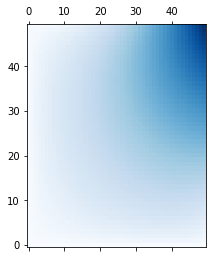

In [23]:
X = 4
Y = 5
def showsol(sol):
    fig = plt.figure(figsize = (10,10))
    plt.matshow(np.sqrt(sol.T),cmap=mpl.cm.Blues,interpolation='none',origin='lower', aspect = Y/X)
    plt.show()

sol = poisson_direct(50, boundary, X, Y) # Сетка из 25 точек
showsol(sol)